# -----------Étape 1: Définition et Compréhension du Problème/Domaine-------------

#### Comprendre la signification des données et le domaine à explorer.

lat (Latitude):String variable representing the latitude coordinate of the emergency call location.
Data Type: String (presumably representing numerical values as strings).
Example: "40.297876"

lng (Longitude): String variable representing the longitude coordinate of the emergency call location.
Data Type: String (presumably representing numerical values as strings).
Example: "-75.581294"

desc (Description):String variable containing the description of the emergency call, including the reason and nature of the emergency reported by the caller.
Data Type: String.
Example: "EMS: BACK PAINS/INJURY"

zip (Zipcode):String variable representing the zipcode of the caller's location as provided during the call.
Data Type: String.
Example: "19525"

title (Title):String variable representing the title or category of the emergency call.
Data Type: String.
Example: "EMS: BACK PAINS/INJURY"

timeStamp:String variable formatted as "YYYY-MM-DD HH:MM:SS", indicating the date and time when the emergency call was received.
Data Type: String (presumably representing datetime values as strings).
Example: "2015-12-10 17:40:00"

twp (Township):String variable specifying the township associated with the emergency call location.
Data Type: String.
Example: "LOWER POTTSGROVE"

addr (Address): String variable indicating the specific address or location of the emergency reported.
Data Type: String.
Example: "LAUREL AVE & OAKLAND AVE"

e (Dummy variable): Dummy variable always set to 1, potentially used as a placeholder or constant variable in the dataset.
Data Type: String (presumably containing the value "1" for all rows).
Example: "1"


#### Comprendre les Objectifs de l'Utilisateur Final:


Gestion des Services d'Urgence:

-Identifier les tendances temporelles des appels d'urgence pour allouer efficacement les ressources en fonction des heures de pointe.
-Déterminer les types d'incidents les plus fréquents pour améliorer la formation et la préparation des équipes d'intervention.
Planification d'Urgence et de Sécurité Publique:

-Cartographier les zones à haut risque en fonction des données géographiques des appels d'urgence.
Analyser les motifs des appels pour mettre en place des initiatives de prévention des incidents.
Analyse de la Santé Publique:

-Examiner les types d'urgences médicales les plus fréquents pour orienter les politiques de santé publique et les services d'urgence médicale.Étudier les variations saisonnières des appels d'urgence liés à la santé pour mieux planifier les ressources médicales.

-Analyse du Trafic et de la Mobilité: Évaluer l'impact des incidents de la circulation sur les appels d'urgence pour améliorer la gestion du trafic.
-Identifier les zones à risque élevé de collisions pour renforcer les mesures de sécurité routière.

# ---------- Étape 3: Préparation des données: -------------

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('911_sample.csv')

In [2]:
# Les variables qualitatives
qualitative_vars = df.select_dtypes(include='object').columns.tolist()
print("Variables Qualitatives :", qualitative_vars)

# Les variables quantitatives
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables Quantitatives :", quantitative_vars)

Variables Qualitatives : ['desc', 'title', 'timeStamp', 'twp', 'addr']
Variables Quantitatives : ['lat', 'lng', 'zip', 'e']


In [3]:
print("Nombre de lignes et de colonnes :")
print(df.shape)

### Affichage des noms des colonnes
print("\nNoms des colonnes :")
print(df.columns)

Nombre de lignes et de colonnes :
(6000, 9)

Noms des colonnes :
Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [4]:
# For qualitative variables
print("Variables qualitatives :")
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column type is object (usually categorical)
        print("• Variable :", col)
        print("  ▪ Type : Categorical")
        print("  ▪ Valeurs distinctes :", df[col].nunique())
        missing_percentage = (df[col].isnull().sum() / len(df)) * 100
        print("  ▪ % des valeurs manquantes :", missing_percentage)
        print()

# For quantitative variables
print("Variables quantitatives :")
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column type is numeric
        print("• Variable :", col)
        print("  ▪ Type : Numeric")
        print("  ▪ Valeurs distinctes :", df[col].nunique())
        print("  ▪ Max :", df[col].max())
        print("  ▪ Min :", df[col].min())
        print("  ▪ Moyenne :", df[col].mean())
        print("  ▪ Ecart-type :", df[col].std())
        missing_percentage = (df[col].isnull().sum() / len(df)) * 100
        print("  ▪ % des valeurs manquantes :", missing_percentage)
        print()

Variables qualitatives :
• Variable : desc
  ▪ Type : Categorical
  ▪ Valeurs distinctes : 6000
  ▪ % des valeurs manquantes : 0.0

• Variable : title
  ▪ Type : Categorical
  ▪ Valeurs distinctes : 81
  ▪ % des valeurs manquantes : 0.0

• Variable : timeStamp
  ▪ Type : Categorical
  ▪ Valeurs distinctes : 5882
  ▪ % des valeurs manquantes : 0.0

• Variable : twp
  ▪ Type : Categorical
  ▪ Valeurs distinctes : 68
  ▪ % des valeurs manquantes : 0.06666666666666667

• Variable : addr
  ▪ Type : Categorical
  ▪ Valeurs distinctes : 3996
  ▪ % des valeurs manquantes : 0.6333333333333333

Variables quantitatives :
• Variable : lat
  ▪ Type : Numeric
  ▪ Valeurs distinctes : 3362
  ▪ Max : 40.4424653
  ▪ Min : 39.9782631
  ▪ Moyenne : 40.1584863798
  ▪ Ecart-type : 0.0861998981361166
  ▪ % des valeurs manquantes : 0.0

• Variable : lng
  ▪ Type : Numeric
  ▪ Valeurs distinctes : 3358
  ▪ Max : -75.0249003
  ▪ Min : -75.7108085
  ▪ Moyenne : -75.31838092695
  ▪ Ecart-type : 0.152063351012220

### ------------ Analyse exploratoire des données --------------

#### -----------------------------------------Prédire la gravité de l'Urgence :-----------------------------------------  ####

##### ---------------------------- Analyse de forme --------------------------------

In [5]:
def determine_severity(t):
    if 'fire' in t.lower():
        return 5  # Incendie (urgence grave)
    elif 'vehicle accident' in t.lower() or 'heart attack' in t.lower():
        return 4  # Accident de voiture ou problème cardiaque (urgence moyenne)
    elif 'syncopal episode' in t.lower():
        return 3  # Épisode syncopal (urgence moyenne)
    elif 'fall' in t.lower():
        return 2  # Chute (urgence mineure)
    else:
        return 1  # Autres (urgence mineure par défaut)

In [6]:
df['severity'] = df['title'].apply(determine_severity)

In [7]:
df.head(20)

lat        lng                                               desc  \
0   40.143927 -75.140021  ALBA RD & NORTH HILLS AVE; UPPER DUBLIN; 2016-...   
1   40.087098 -75.127827  TOWNSHIP LINE RD & OLD YORK RD; ABINGTON; 2016...   
2   40.410604 -75.473671  GERYVILLE PIKE & RT663;  UPPER HANOVER; Statio...   
3   40.064803 -75.096843  RT309 EXPY & S EASTON RD OVERPASS; CHELTENHAM;...   
4   40.255841 -75.628315  ADAMS ST & PROSPECT ST;  POTTSTOWN; Station 32...   
5   40.243186 -75.265902  AILEEN DR;  MONTGOMERY; Station 345; 2016-06-2...   
6   40.127614 -75.404582  TROOPER RD & BOULEVARD OF THE GENERALS; LOWER ...   
7   40.245498 -75.617841  ROSEDALE DR & BEECH ST; POTTSTOWN; 2015-12-17 ...   
8   40.172314 -75.492728  S COLLEGEVILLE RD & RT422 OVERPASS; UPPER PROV...   
9   40.168538 -75.498200  BLACK ROCK RD & S TRAPPE RD;  UPPER PROVIDENCE...   
10  40.260536 -75.366608  MAIN ST & GODSHALL DR;  LOWER SALFORD; Station...   
11  40.101101 -75.150726  WOODLYN AVE & MT CARMEL AVE;  ABINGTON; Statio...   
12  40.114239 -75.338508  AIRY ST & ARCH ST; NORRISTOWN; 2016-06-15 @ 16...   
13  40.251801 -75.340484  WOOD HOLLOW DR & BAYBERRY CT;  TOWAMENCIN; Sta...   
14  40.209755 -75.620996  CEDARVILLE RD & ELLIS WOODS RD;  CHESTER COUNT...   
15  40.197327 -75.484568  7TH AVE & LINDEN ST;  TRAPPE; Station 324; 201...   
16  40.157844 -75.226243  TENNIS AVE & N SPRING GARDEN ST; AMBLER; 2016-...   
17  40.221966 -75.414025  WENDY WAY & MICHELE AVE;  SKIPPACK; Station 33...   
18  40.122011 -75.232109  JOSHUA RD & MILITIA HILL RD; WHITEMARSH; 2016-...   
19  40.085407 -75.097442  FOX CHASE RD & HENSEL ST; ROCKLEDGE; 2016-08-1...   

        zip                           title            timeStamp  \
0   19090.0             Fire: GAS-ODOR/LEAK  2016-04-06 13:37:01   
1   19046.0     Traffic: DISABLED VEHICLE -  2016-07-07 14:22:03   
2   18073.0            EMS: ABDOMINAL PAINS  2016-03-31 13:32:00   
3   19012.0         Traffic: VEHICLE FIRE -  2016-07-14 08:07:02   
4   19464.0               EMS: HEMORRHAGING  2016-06-01 11:02:00   
5   19446.0           EMS: VEHICLE ACCIDENT  2016-06-23 15:47:01   
6   19403.0     Traffic: VEHICLE ACCIDENT -  2015-12-14 12:47:02   
7   19464.0     Traffic: VEHICLE ACCIDENT -  2015-12-17 14:52:02   
8       NaN     Traffic: DISABLED VEHICLE -  2016-06-11 16:37:02   
9   19468.0            EMS: SUBJECT IN PAIN  2016-07-28 19:12:00   
10  19438.0      EMS: RESPIRATORY EMERGENCY  2016-08-09 19:42:00   
11  19038.0  EMS: UNKNOWN MEDICAL EMERGENCY  2016-03-06 15:47:00   
12  19401.0     Traffic: VEHICLE ACCIDENT -  2016-06-15 16:32:01   
13  19438.0          EMS: CARDIAC EMERGENCY  2016-04-13 00:57:00   
14  19465.0                   EMS: SEIZURES  2016-06-23 20:22:00   
15  19426.0      EMS: RESPIRATORY EMERGENCY  2016-03-30 16:52:00   
16  19002.0     Traffic: VEHICLE ACCIDENT -  2016-06-07 16:27:01   
17  19473.0      EMS: RESPIRATORY EMERGENCY  2016-06-12 01:17:01   
18  19034.0     Traffic: DISABLED VEHICLE -  2016-02-15 19:02:02   
19  19046.0        Fire: FIRE INVESTIGATION  2016-08-17 21:12:00   

                 twp                                    addr  e  severity  
0       UPPER DUBLIN               ALBA RD & NORTH HILLS AVE  1         5  
1           ABINGTON          TOWNSHIP LINE RD & OLD YORK RD  1         1  
2      UPPER HANOVER                  GERYVILLE PIKE & RT663  1         1  
3         CHELTENHAM       RT309 EXPY & S EASTON RD OVERPASS  1         5  
4          POTTSTOWN                  ADAMS ST & PROSPECT ST  1         1  
5         MONTGOMERY                               AILEEN DR  1         4  
6   LOWER PROVIDENCE  TROOPER RD & BOULEVARD OF THE GENERALS  1         4  
7          POTTSTOWN                  ROSEDALE DR & BEECH ST  1         4  
8   UPPER PROVIDENCE      S COLLEGEVILLE RD & RT422 OVERPASS  1         1  
9   UPPER PROVIDENCE             BLACK ROCK RD & S TRAPPE RD  1         1  
10     LOWER SALFORD                   MAIN ST & GODSHALL DR  1         1  
11       

#### --------------------------------------- Interpréter la nature des appels d'urgence ------------------------------------------ ####

##### ------------------------------------------------ Analyse du fond: -----------------------------------------##### 

#####                                                                   1. Compréhension des différentes variables (Vue d’ensemble) :  

In [8]:
# Exploration de la variable de gravité (target)
# Fréquence des différents niveaux de gravité
severity_counts = df['severity'].value_counts()
print("Fréquence des différents niveaux de gravité :")
print(severity_counts)

Fréquence des différents niveaux de gravité :
severity
1    3029
4    1657
5     926
2     298
3      90
Name: count, dtype: int64


##### 2. Visualisation de la cible : ####

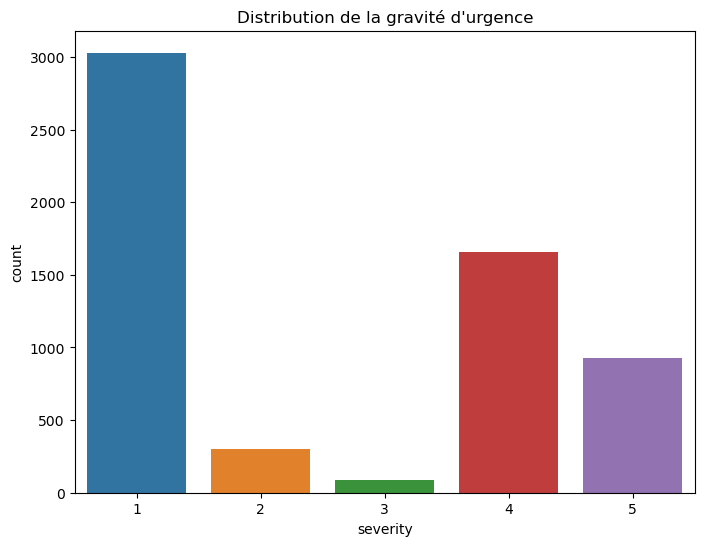

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution de gravité d'urgence
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='severity')
plt.title('Distribution de la gravité d\'urgence')
plt.show()


##### 3. Relations Variable-Target (Classe) :

C:\Users\yousr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


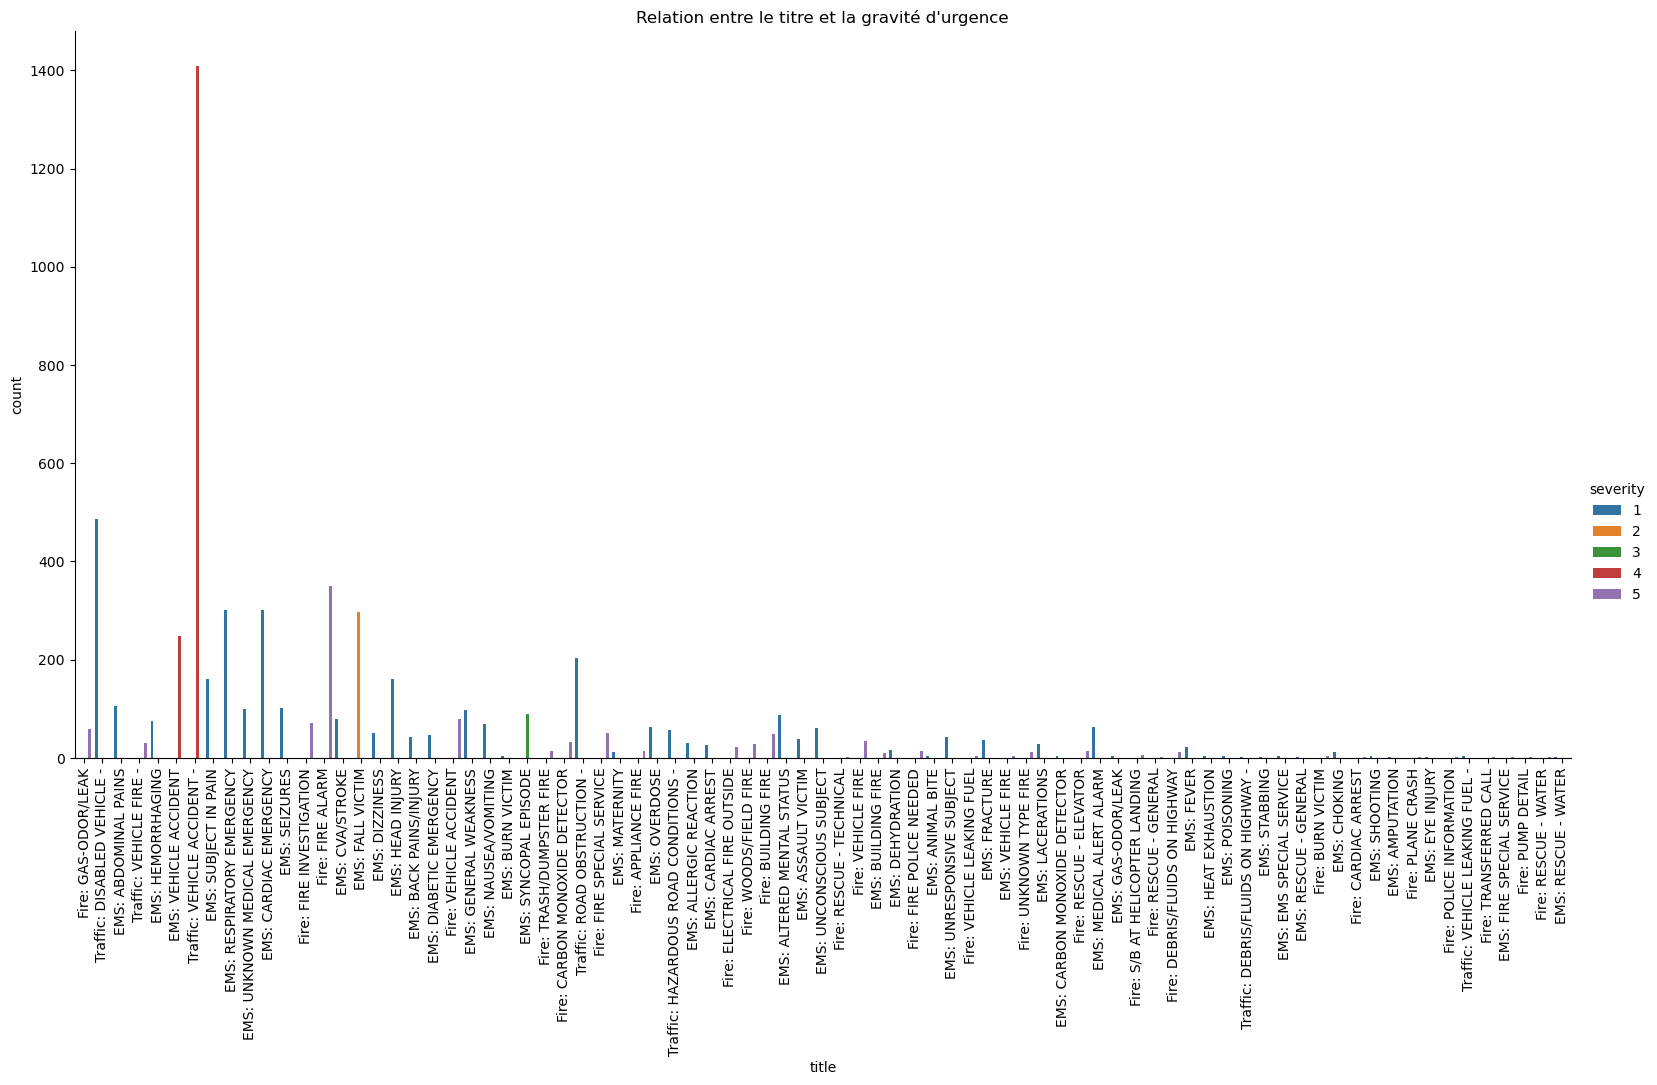

In [10]:
# Relation entre la gravité d'urgence et d'autres variables catégorielles
sns.catplot(x='title', hue='severity', kind='count', data=df, height=8, aspect=2)
plt.xticks(rotation=90)
plt.title('Relation entre le titre et la gravité d\'urgence')
plt.show()


#### 4. Identification des valeurs aberrantes (Outliers) :

In [11]:
import numpy as np

# Détection des valeurs aberrantes (outliers) dans la gravité d'urgence
Q1 = np.percentile(df['severity'], 25)
Q3 = np.percentile(df['severity'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['severity'] < lower_bound) | (df['severity'] > upper_bound)]
print("Nombre de valeurs aberrantes dans la gravité d'urgence :", len(outliers))
print(outliers)


Nombre de valeurs aberrantes dans la gravité d'urgence : 0
Empty DataFrame
Columns: [lat, lng, desc, zip, title, timeStamp, twp, addr, e, severity]
Index: []


##### 5. Covariance entre deux attributs :

In [12]:
# Calcul de la covariance entre la gravité d'urgence (severity) et une autre variable (par exemple, latitude)
covariance = df['severity'].cov(df['lat'])
print("Covariance entre la gravité d'urgence et la latitude :", covariance)


Covariance entre la gravité d'urgence et la latitude : -0.00758390865300889


##### 6. Coefficient de corrélation (entre -1 et 1) :

In [13]:
# Calcul du coefficient de corrélation entre la gravité d'urgence (severity) et une autre variable (par exemple, longitude)
correlation = df['severity'].corr(df['lng'])
print("Coefficient de corrélation entre la gravité d'urgence et la longitude :", correlation)


Coefficient de corrélation entre la gravité d'urgence et la longitude : 0.029302324802216482


In [14]:
# Exclusion des valeurs aberrantes de la gravité d'urgence (par exemple, en utilisant la méthode des IQR comme mentionné précédemment)
Q1 = np.percentile(df['severity'], 25)
Q3 = np.percentile(df['severity'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour exclure les valeurs aberrantes
filtered_data = df[(df['severity'] >= lower_bound) & (df['severity'] <= upper_bound)]

# Calcul du coefficient de corrélation avec les données filtrées
correlation_filtered = filtered_data['severity'].corr(filtered_data['lng'])
print("Coefficient de corrélation (après exclusion des valeurs aberrantes) :", correlation_filtered)


Coefficient de corrélation (après exclusion des valeurs aberrantes) : 0.029302324802216482


In [15]:
##### 7. Matrice de Corrélation :

In [16]:
import pandas as pd

numeric_columns = df.select_dtypes(include='number')

# Calcul de la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Affichage de la matrice de corrélation
print("Matrice de corrélation :\n", correlation_matrix)

Matrice de corrélation :
                lat       lng       zip   e  severity
lat       1.000000 -0.488517  0.001115 NaN -0.053172
lng      -0.488517  1.000000 -0.362486 NaN  0.029302
zip       0.001115 -0.362486  1.000000 NaN -0.025382
e              NaN       NaN       NaN NaN       NaN
severity -0.053172  0.029302 -0.025382 NaN  1.000000


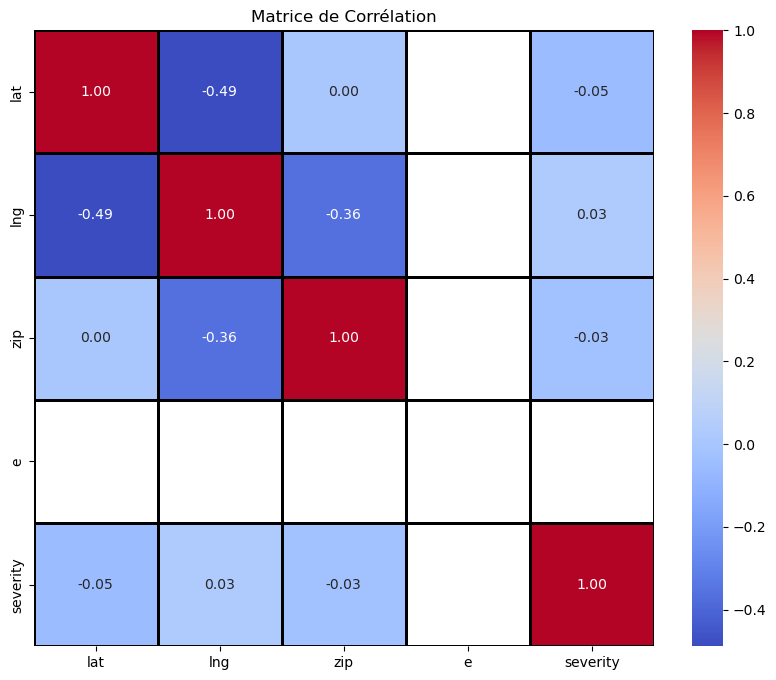

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de la taille du heatmap
plt.figure(figsize=(10, 8))

# Création du heatmap avec Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

# Ajout du titre
plt.title('Matrice de Corrélation')

# Affichage du heatmap
plt.show()


#### --------------------------- la Cartographie des Zones à Haut Risque : --------------------- ####


In [18]:
# Regrouper les incidents par zone géographique (latitude et longitude)
grouped_data = df.groupby(['lat', 'lng'])


In [19]:
# Calculer la gravité moyenne pour chaque zone géographique
severity_by_location = grouped_data['severity'].mean().reset_index()



In [20]:

# Identifier les zones géographiques les plus à risque
most_risk_zones = severity_by_location.sort_values(by='severity', ascending=False).head(10)

# Afficher les zones géographiques les plus à risque
print("Zones géographiques les plus à risque :")
print(most_risk_zones)



Zones géographiques les plus à risque :
            lat        lng  severity
2242  40.201202 -75.346531       5.0
2159  40.190804 -75.434540       5.0
2195  40.195183 -75.460369       5.0
2193  40.194648 -75.466064       5.0
532   40.079443 -75.331833       5.0
2188  40.193878 -75.541028       5.0
2181  40.192829 -75.134668       5.0
2172  40.192001 -75.332102       5.0
2164  40.191214 -75.255657       5.0
2156  40.190335 -75.408519       5.0


In [21]:
import folium

# Coordonnées centrales pour l'affichage initial de la carte
center_lat, center_lng = df['lat'].mean(), df['lng'].mean()

# Créer une carte centrée sur les coordonnées moyennes des incidents
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# Ajouter des marqueurs pour chaque zone géographique avec un niveau de gravité moyen élevé
for index, row in most_risk_zones.iterrows():
    lat, lng, severity = row['lat'], row['lng'], row['severity']
    popup_text = f"Lat: {lat}, Lng: {lng}, severity: {severity}"
    folium.Marker([lat, lng], popup=popup_text, icon=folium.Icon(color='red')).add_to(mymap)

# Enregistrer la carte sous forme de fichier HTML
mymap.save("risk_zones_map.html")

# Afficher la carte
mymap

In [22]:
import folium

# Regrouper les incidents par zone géographique (latitude et longitude)
grouped_data = df.groupby(['lat', 'lng'])

# Calculer la gravité moyenne pour chaque zone géographique
severity_by_location = grouped_data['severity'].mean().reset_index()

# Coordonnées centrales pour l'affichage initial de la carte
center_lat, center_lng = df['lat'].mean(), df['lng'].mean()

# Créer une carte centrée sur les coordonnées moyennes des incidents
mymap = folium.Map(location=[center_lat, center_lng], zoom_start=10)

# Définir les couleurs en fonction du niveau de gravité
severity_colors = {
    5: 'red',   # Niveau de gravité 5 (rouge)
    4: 'orange',  # Niveau de gravité 4 (orange)
    3: 'yellow',  # Niveau de gravité 3 (jaune)
    2: 'green',   # Niveau de gravité 2 (vert)
    1: 'blue'   # Niveau de gravité 1 (bleu)
}

# Créer un cercle pour chaque zone avec une couleur correspondant à son niveau de gravité
for index, row in severity_by_location.iterrows():
    lat, lng, severity = row['lat'], row['lng'], row['severity']
    popup_text = f"Lat: {lat}, Lng: {lng}, severity: {severity}"
    folium.CircleMarker([lat, lng], radius=1, color=severity_colors.get(int(severity), 'black'), fill=True, fill_color=severity_colors.get(int(severity), 'black'), fill_opacity=0.7, popup=popup_text).add_to(mymap)

# Enregistrer la carte sous forme de fichier HTML
mymap.save("risk_zones_map.html")

# Afficher la carte
mymap


Types d'incidents les plus fréquents :
 title
Traffic: VEHICLE ACCIDENT -    1409
Traffic: DISABLED VEHICLE -     486
Fire: FIRE ALARM                351
EMS: CARDIAC EMERGENCY          302
EMS: RESPIRATORY EMERGENCY      301
EMS: FALL VICTIM                298
EMS: VEHICLE ACCIDENT           248
Traffic: ROAD OBSTRUCTION -     204
EMS: HEAD INJURY                161
EMS: SUBJECT IN PAIN            160
Name: count, dtype: int64


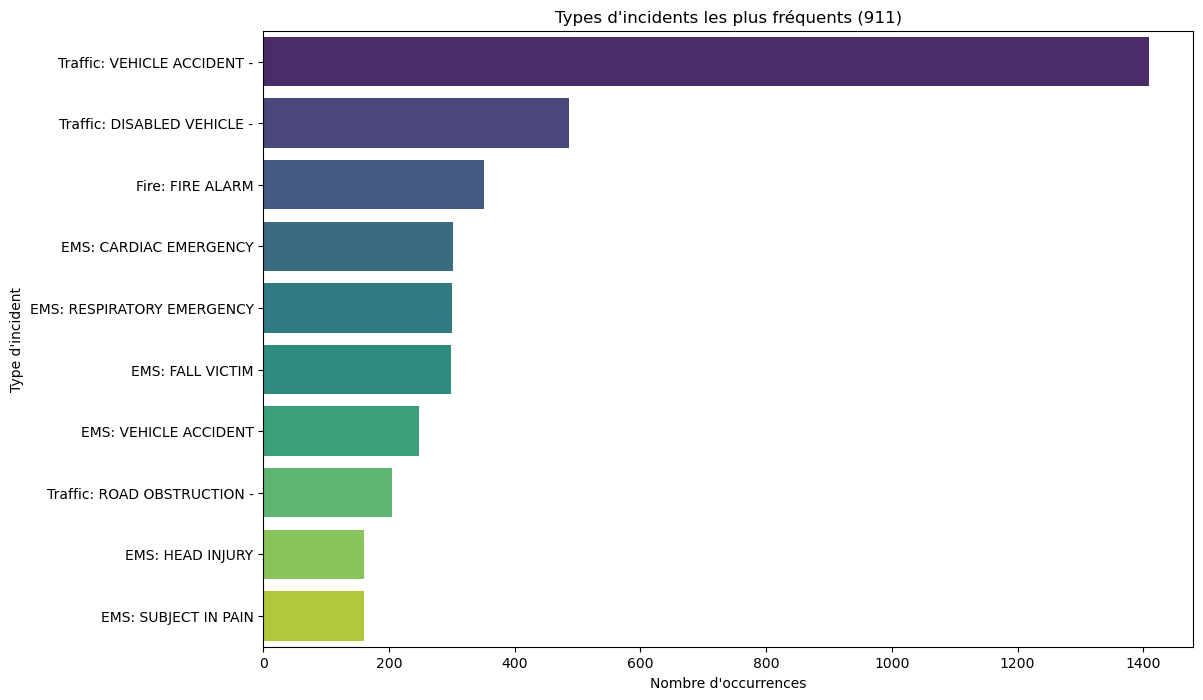

In [23]:
# Analyse des types d'incidents les plus fréquents
incident_counts = df['title'].value_counts()

# Afficher les types d'incidents les plus fréquents
print("\nTypes d'incidents les plus fréquents :\n", incident_counts.head(10))

# Visualisation - Créer un diagramme à barres pour montrer la fréquence des types d'incidents
plt.figure(figsize=(12, 8))
sns.barplot(x=incident_counts.head(10).values, y=incident_counts.head(10).index, palette='viridis')
plt.title("Types d'incidents les plus fréquents (911)")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Type d'incident")
plt.show()

In [24]:
# Filtrer les incidents liés aux collisions (ex. VEHICLE ACCIDENT)
collision_incidents = df[df['title'].str.contains('VEHICLE ACCIDENT', case=False)]

# Groupement par localisation (latitude et longitude) pour compter les incidents par emplacement
location_counts = collision_incidents.groupby(['lat', 'lng']).size().reset_index(name='incident_count')

# Identifier les zones à risque élevé (par exemple, les emplacements avec le plus grand nombre d'incidents)
high_risk_zones = location_counts.sort_values(by='incident_count', ascending=False).head(10)

# Créer une carte centrée sur les coordonnées moyennes des incidents
mymap = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=10)

# Ajouter des marqueurs pour les zones à risque élevé sur la carte
for index, row in high_risk_zones.iterrows():
    lat, lng, incident_count = row['lat'], row['lng'], row['incident_count']
    popup_text = f"Nombre d'incidents : {incident_count}"
    folium.CircleMarker([lat, lng], radius=incident_count/10, popup=popup_text, color='red', fill=True, fill_color='red').add_to(mymap)

# Enregistrer la carte sous forme de fichier HTML
mymap.save("high_risk_zones_map.html")

# Afficher la carte
mymap

## Pré-traitement des donnée

### Nettoyage des données

In [25]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes avant nettoyage :")
print(df.isnull().sum())



Valeurs manquantes avant nettoyage :
lat            0
lng            0
desc           0
zip          779
title          0
timeStamp      0
twp            4
addr          38
e              0
severity       0
dtype: int64


In [26]:
# Supprimer les lignes avec des valeurs manquantes
df_cleaned = df.dropna()

print("\nValeurs manquantes après nettoyage :")
print(df_cleaned.isnull().sum())



Valeurs manquantes après nettoyage :
lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
severity     0
dtype: int64


### Encodage des colonnes catégorielles et Numériques

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Appliquer le label encoding aux colonnes catégorielles
label_encoder = LabelEncoder()

# Liste des colonnes catégorielles à encoder
categorical_columns = ['title', 'twp', 'addr']

for col in categorical_columns:
    df_cleaned.loc[:, col] = label_encoder.fit_transform(df_cleaned[col])

# Normaliser les colonnes numériques
scaler = StandardScaler()
df_cleaned.loc[:, ['lat', 'lng', 'zip']] = scaler.fit_transform(df_cleaned[['lat', 'lng', 'zip']])

# Afficher le dataframe transformé
df_cleaned.head()


lat       lng                                               desc  \
0 -0.184122  1.133565  ALBA RD & NORTH HILLS AVE; UPPER DUBLIN; 2016-...   
1 -0.839285  1.211920  TOWNSHIP LINE RD & OLD YORK RD; ABINGTON; 2016...   
2  2.890288 -1.010394  GERYVILLE PIKE & RT663;  UPPER HANOVER; Statio...   
3 -1.096308  1.411020  RT309 EXPY & S EASTON RD OVERPASS; CHELTENHAM;...   
4  1.106092 -2.004100  ADAMS ST & PROSPECT ST;  POTTSTOWN; Station 32...   

        zip title            timeStamp twp  addr  e  severity  
0 -0.522711    57  2016-04-06 13:37:01  51    98  1         5  
1 -0.681067    71  2016-07-07 14:22:03   0  3092  1         1  
2 -4.182876     0  2016-03-31 13:32:00  54  1231  1         1  
3 -0.803432    75  2016-07-14 08:07:02   6  2689  1         5  
4  0.823308    27  2016-06-01 11:02:00  39    85  1         1

In [28]:
df_cleaned = df_cleaned.drop(['desc', 'e'], axis=1)

In [29]:
df_cleaned = df_cleaned.drop(['timeStamp'], axis=1)

In [30]:
df_cleaned

lat       lng       zip title twp  addr  severity
0    -0.184122  1.133565 -0.522711    57  51    98         5
1    -0.839285  1.211920 -0.681067    71   0  3092         1
2     2.890288 -1.010394 -4.182876     0  54  1231         1
3    -1.096308  1.411020 -0.803432    75   6  2689         5
4     1.106092 -2.004100  0.823308    27  39    85         1
...        ...       ...       ...   ...  ..   ...       ...
5995 -1.996796  0.382126 -0.303174    60  24   607         5
5996  0.918863 -2.153861  0.826907    74   7  2726         4
5997  0.981732 -0.154898  0.729734    56  49  2965         5
5998  2.200784 -1.320591 -4.179277    54  32  1467         5
5999  0.429097 -0.825367  0.686547     0  27  3094         1

[5216 rows x 7 columns]

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('911.csv')
df

lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...  19003.0   
99489  CHESTNUT ST & WALNUT ST;  NORRISTOWN; Station ...  19401.0   
99490  WELSH RD & WEBSTER LN;  HORSHAM; Station 352; ...  19002.0   
99491  MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...  19446.0   

                             title            timeStamp                twp  \
0           EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1          EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2              Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3           EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4                   EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   
...                            ...                  ...                ...   
99487  Traffic: VEHICLE ACCIDENT -  2016-08-24 11:06:00         NORRISTOWN   
99488  Traffic: VEHICLE ACCIDENT -  2016-08-24 11:07:02       LOWER MERION   
99489             EMS: FALL VICTIM  2016-08-24 11:12:00         NORRISTOWN   
99490         EMS: NAUSEA/VOMITING  2016-08-24 11:17:01            HORSHAM   
99491  Traffic: VEHICLE ACCIDENT -  2016-08-24 11:17:02      UPPER GWYNEDD   

                                 addr  e  
0              REINDEER CT & DEAD END  1  
1          BRIAR PATH & WHITEMARSH LN  1  
2                            HAWS AVE  1  
3                  AIRY ST & SWEDE ST  1  
4            CHERRYWOOD CT & DEAD END  1  
...                               ... ..  
99487         MARKLEY ST & W LOGAN ST  1  
99488  LANCASTER AVE & RITTENHOUSE PL  1  
99489         CHESTNUT ST & WALNUT ST  1  
99490           WELSH RD & WEBSTER LN  1  
99491          MORRIS RD & S BROAD ST  1  

[99492 rows x 9 columns]

In [32]:
def determine_severity(t):
    if 'fire' in t.lower():
        return 5  # Incendie (urgence grave)
    elif 'vehicle accident' in t.lower() or 'heart attack' in t.lower():
        return 4  # Accident de voiture ou problème cardiaque (urgence moyenne)
    elif 'syncopal episode' in t.lower():
        return 3  # Épisode syncopal (urgence moyenne)
    elif 'fall' in t.lower():
        return 2  # Chute (urgence mineure)
    else:
        return 1  # Autres (urgence mineure par défaut)

df['severity'] = df['title'].apply(determine_severity)


### Création des ensembles d'entraînement et de test

In [33]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('severity', axis=1) # X contient toutes les colonnes sauf 'severity'
y = df_cleaned['severity']  # y contient seulement la colonne 'severity'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)


In [34]:
print(f"Taille de X_train: {X_train.shape}")
print(f"Taille de X_test: {X_test.shape}")
print(f"Taille de y_train: {y_train.shape}")
print(f"Taille de y_test: {y_test.shape}")


Taille de X_train: (1043, 6)
Taille de X_test: (4173, 6)
Taille de y_train: (1043,)
Taille de y_test: (4173,)


In [35]:
print("Premières lignes de X_train :\n", X_train.head())
print("\nPremières lignes de X_test :\n", X_test.head())
print("\nPremières lignes de y_train :\n", y_train.head())
print("\nPremières lignes de y_test :\n", y_test.head())


Premières lignes de X_train :
            lat       lng       zip title twp  addr
4691  0.328389  1.166006 -0.688265    71  18   977
4738 -0.105907 -0.379097  0.603770    16  61  1475
2310 -0.481790 -0.148488  0.596572    25  33   822
419  -0.209429  0.024566  0.596572    11  13  1200
3964 -0.671798  1.052928 -0.709859    71   0  2719

Premières lignes de X_test :
            lat       lng       zip title twp  addr
2774  0.287940 -0.853622  0.686547    74   8  1867
1592 -0.102171  1.242005 -0.522711    44  56  1238
5149 -1.754904  0.136353 -0.835823     2  24   151
3571 -0.856640 -0.480583  0.614567    37  55  1314
45   -1.616793  0.419842 -0.587493    13  24  2612

Premières lignes de y_train :
 4691    1
4738    1
2310    1
419     1
3964    1
Name: severity, dtype: int64

Premières lignes de y_test :
 2774    4
1592    4
5149    1
3571    1
45      1
Name: severity, dtype: int64


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Création des pipelines pour chaque modèle
pipeline_svm = Pipeline([('svm_classifier', SVC(random_state=0))])
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=0,max_iter=100000))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=0))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(random_state=0))])
pipeline_knn = Pipeline([('knn_classifier', KNeighborsClassifier(n_neighbors=3))])
pipeline_gb = Pipeline([('gb_classifier', GradientBoostingClassifier(random_state=0))])

# Liste des modèles
pipelines = [pipeline_svm, pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_gb]

# Dictionnaire des pipelines et des types de classificateurs pour faciliter la référence
pipe_dict = {
    0: 'Support Vector Machine',
    1: 'Logistic Regression', 
    2: 'Decision Tree', 
    3: 'RandomForest', 
    4: 'KNN',
    5: 'Gradient Boosting'
}

# Définir le nombre de splits pour KFold
n_splits = 5
cross_val = KFold(n_splits=n_splits, shuffle=True, random_state=0)  # KFold avec 5 splits

# Entraînement des modèles et évaluation avec validation croisée
for idx, pipe in enumerate(pipelines):
    # Calculer la précision moyenne avec validation croisée
    accuracy_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cross_val)
    
    # Afficher la précision moyenne
    print(f'{pipe_dict[idx]} Mean Accuracy: {accuracy_scores.mean():.4f}')
    
    # Entraîner le modèle sur l'ensemble d'entraînement complet
    pipe.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = pipe.predict(X_test)
    
    # Rapport de classification sur l'ensemble de test
    print(f'Classification Report for {pipe_dict[idx]}:\n', classification_report(y_test, y_pred ,  zero_division=1))


Support Vector Machine Mean Accuracy: 0.5312
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           1       0.52      1.00      0.68      2163
           2       1.00      0.00      0.00       224
           3       1.00      0.00      0.00        70
           4       1.00      0.00      0.00      1088
           5       1.00      0.00      0.00       628

    accuracy                           0.52      4173
   macro avg       0.90      0.20      0.14      4173
weighted avg       0.75      0.52      0.35      4173

Logistic Regression Mean Accuracy: 0.6309
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.64      0.79      0.71      2163
           2       1.00      0.00      0.00       224
           3       1.00      0.00      0.00        70
           4       0.64      0.89      0.74      1088
           5       1.00      0.01      0.02       628


## Évaluation du modèle

In [37]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

# Définition de la validation croisée avec KFold
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)  # Assurez-vous que chaque pli contient une proportion similaire d'exemples de chaque classe
scorer = make_scorer(f1_score, average='micro')

# Entraînement et évaluation des modèles
for i, model in enumerate(pipelines):
    f1_scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=cross_val)
    print(pipe_dict[i], ": f1-score : ", f1_scores.mean())


Support Vector Machine : f1-score :  0.531151085756349
Logistic Regression : f1-score :  0.6280318365844682
Decision Tree : f1-score :  0.9980861244019138
RandomForest : f1-score :  0.940541037909459
KNN : f1-score :  0.5877714390872286
Gradient Boosting : f1-score :  1.0


In [38]:
from sklearn.metrics import f1_score, matthews_corrcoef

# Test et évaluation des modèles
for i, model in enumerate(pipelines):
    model.fit(X_train, y_train)  # Entraîner le modèle sur l'ensemble d'entraînement
    y_pred = model.predict(X_test)  # Faire des prédictions sur l'ensemble de test

    # Calculer le f1-score et le MCC
    model_score = f1_score(y_test, y_pred, average='weighted')
    MCC = matthews_corrcoef(y_test, y_pred)

    print(pipe_dict[i], ": f1-score : ", model_score, " MCC : ", MCC, "\n")


Support Vector Machine : f1-score :  0.3538991187939787  MCC :  0.0 

Logistic Regression : f1-score :  0.5626831269390059  MCC :  0.39765958881219354 

Decision Tree : f1-score :  0.9954425217416079  MCC :  0.9928568193551263 

RandomForest : f1-score :  0.9384943044764283  MCC :  0.9167698096955924 

KNN : f1-score :  0.5721968136097675  MCC :  0.3219944411745282 

Gradient Boosting : f1-score :  0.9976062534296085  MCC :  0.9962458038083659 



In [39]:
#afficher le rapport de classification des mdèles
from sklearn.metrics import classification_report
for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    print("----------------%s---------------- \n" % (pipe_dict[i]))
    print(classification_report(y_test, y_pred ,zero_division=1 ))

----------------Support Vector Machine---------------- 

              precision    recall  f1-score   support

           1       0.52      1.00      0.68      2163
           2       1.00      0.00      0.00       224
           3       1.00      0.00      0.00        70
           4       1.00      0.00      0.00      1088
           5       1.00      0.00      0.00       628

    accuracy                           0.52      4173
   macro avg       0.90      0.20      0.14      4173
weighted avg       0.75      0.52      0.35      4173

----------------Logistic Regression---------------- 

              precision    recall  f1-score   support

           1       0.64      0.79      0.71      2163
           2       1.00      0.00      0.00       224
           3       1.00      0.00      0.00        70
           4       0.64      0.89      0.74      1088
           5       1.00      0.01      0.02       628

    accuracy                           0.64      4173
   macro avg       0

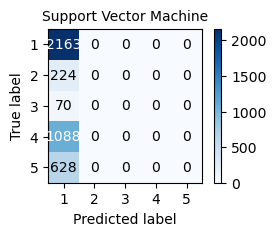

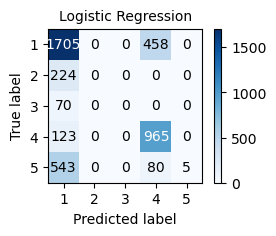

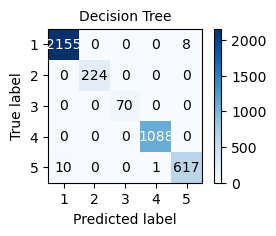

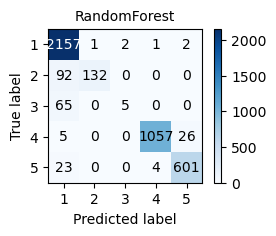

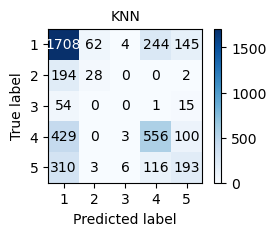

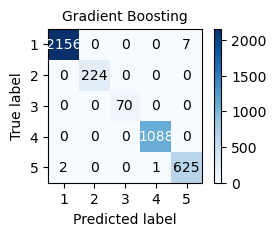

In [41]:
#afficher la matrice de confusion des mdèles
from scikitplot.metrics import plot_confusion_matrix
for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test,y_pred,figsize=(3,2),normalize=False)
    plt.title(pipe_dict[i],size=10)
    plt.show()

# Optimiser Random Forest, Decision Tree et Gradient Boosting


# 1-Random Forest 

In [125]:
#afficher les paramètres et leurs valeurs actuelles pour Random Forest
pipeline_rf['rf_classifier'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [126]:
import warnings
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Définition des hyperparamètres pour Random Forest
hyper_params_rf = { 
    'n_estimators': [100, 150, 200, 500, 700, 900],
    'max_features': [1, 2, 3, 4, None, 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 12, 14, 16],
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1, 1, None]
}


# StratifiedKFold avec shuffle et random_state
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Ignorer spécifiquement les avertissements liés à la classe la moins peuplée
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Initialisation de RandomizedSearchCV avec error_score='raise'
grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), hyper_params_rf, scoring='f1_weighted', cv=skf, n_iter=40, error_score='raise')
grid_rf.fit(X_train, y_train)

# Restaurer les paramètres d'avertissement après l'exécution de RandomizedSearchCV si nécessaire
warnings.filterwarnings('default', category=UserWarning, module='sklearn')

# Affichage des meilleurs paramètres trouvés
print(grid_rf.best_params_)


{'n_jobs': -1, 'n_estimators': 500, 'max_features': None, 'max_depth': 6, 'criterion': 'gini'}


---------------Random forest---------------

F1 :  0.9963977693117231
MCC :  0.9943612266993918 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2163
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00      1088
           5       0.99      0.98      0.99       628

    accuracy                           1.00      4173
   macro avg       1.00      1.00      1.00      4173
weighted avg       1.00      1.00      1.00      4173



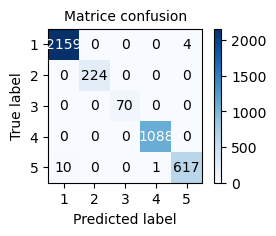

In [127]:
#Evaluation du modèle optimisé (Random Forest)
y_pred = grid_rf.predict(X_test)
print('---------------Random forest---------------\n')
print('F1 : ', f1_score(y_test, y_pred,average='weighted'))
print('MCC : ', matthews_corrcoef(y_test, y_pred),'\n')
#afficher le rapport de classification
print(classification_report(y_test, y_pred))
#afficher la matrice de confusion
plot_confusion_matrix(y_test,y_pred,figsize=(3,2),normalize=False)
plt.title('Matrice confusion',size=10)
plt.show()

# 2-Decision Tree

In [42]:
#afficher les paramètres et leurs valeurs actuelles pour Decision Tree
pipeline_dt['dt_classifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [43]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définition des hyperparamètres pour Decision Tree
hyper_params_dt = {
    'max_features': [None, 'sqrt', 'log2'],  # Ajoutez None pour utiliser toutes les features
    'ccp_alpha': [0.1, 0.01, 0.001],
    'max_depth': [5, 6, 7, 8, 9],
    'criterion': ['gini', 'entropy']
}

# Ignorer spécifiquement les avertissements liés à la classe la moins peuplée
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Initialisation de RandomizedSearchCV avec error_score='raise'
grid_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), hyper_params_dt, scoring='f1_weighted', cv=5, n_iter=40, error_score='raise')
grid_dt.fit(X_train, y_train)

# Restaurer les paramètres d'avertissement après l'exécution de RandomizedSearchCV si nécessaire
warnings.filterwarnings('default', category=UserWarning, module='sklearn')

# Affichage des meilleurs paramètres trouvés
print(grid_dt.best_params_)


{'max_features': None, 'max_depth': 9, 'criterion': 'gini', 'ccp_alpha': 0.01}


---------------Decision Tree---------------

F1 :  0.9963977693117231
MCC :  0.9943612266993918 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2163
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00      1088
           5       0.99      0.98      0.99       628

    accuracy                           1.00      4173
   macro avg       1.00      1.00      1.00      4173
weighted avg       1.00      1.00      1.00      4173



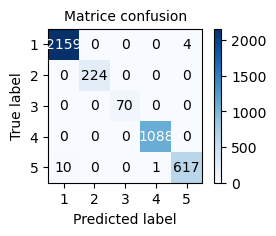

In [44]:
#Evaluation du modèle optimisé (Decision Tree)
y_pred = grid_dt.predict(X_test)
print('---------------Decision Tree---------------\n')
print('F1 : ', f1_score(y_test, y_pred,average='weighted'))
print('MCC : ', matthews_corrcoef(y_test, y_pred),'\n')
#afficher le rapport de classification
print(classification_report(y_test, y_pred,zero_division=1))
#afficher le rapport de classification
plot_confusion_matrix(y_test,y_pred,figsize=(3,2),normalize=False)
plt.title('Matrice confusion',size=10)
plt.show()

# 3-Gradient Boosting

In [45]:
#afficher les paramètres et leurs valeurs actuelles pour Gradient Boosting
pipeline_gb['gb_classifier'].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [48]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Définition des hyperparamètres pour Gradient Boosting
hyper_params_gb = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

# Ignorer spécifiquement les avertissements liés à la classe la moins peuplée
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Initialisation de RandomizedSearchCV avec error_score='raise'
grid_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=0), hyper_params_gb, scoring='f1_weighted', cv=5, n_iter=40, error_score='raise')
grid_gb.fit(X_train, y_train)

# Restaurer les paramètres d'avertissement après l'exécution de RandomizedSearchCV si nécessaire
warnings.filterwarnings('default', category=UserWarning, module='sklearn')

# Affichage des meilleurs paramètres trouvés
print(grid_gb.best_params_)


{'n_estimators': 250, 'max_depth': 3, 'learning_rate': 1}


---------------Gradient Boosting---------------

F1 :  0.9976062534296085
MCC :  0.9962458038083659 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2163
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00      1088
           5       0.99      1.00      0.99       628

    accuracy                           1.00      4173
   macro avg       1.00      1.00      1.00      4173
weighted avg       1.00      1.00      1.00      4173



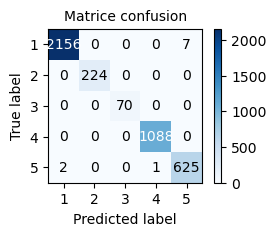

In [47]:
#Evaluation du modèle optimisé (Gradien Boosting)
y_pred = grid_gb.predict(X_test)
print('---------------Gradient Boosting---------------\n')
print('F1 : ', f1_score(y_test, y_pred,average='weighted'))
print('MCC : ', matthews_corrcoef(y_test, y_pred),'\n')
#afficher le rapport de classification
print(classification_report(y_test, y_pred))
#afficher le rapport de classification
plot_confusion_matrix(y_test,y_pred,figsize=(3,2),normalize=False)
plt.title('Matrice confusion',size=10)
plt.show()

# Enregistrer le modèle final

In [49]:
#Enregistrer le modèle final (Gradient Boosting optimisé)
import pickle
file_path = 'Classification_app/model.pkl'
pickle.dump(grid_gb, open(file_path, 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Classification_app/model.pkl'